In [7]:
import tvgl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load data
X = np.loadtxt("testdata.txt")

# Set parameters
alpha = 15
beta = 20
penalty_type = "L2"
slice_size = 100

# Run TVGL
model = tvgl.TVGL(alpha, beta, penalty_type, slice_size)
model.fit(X)

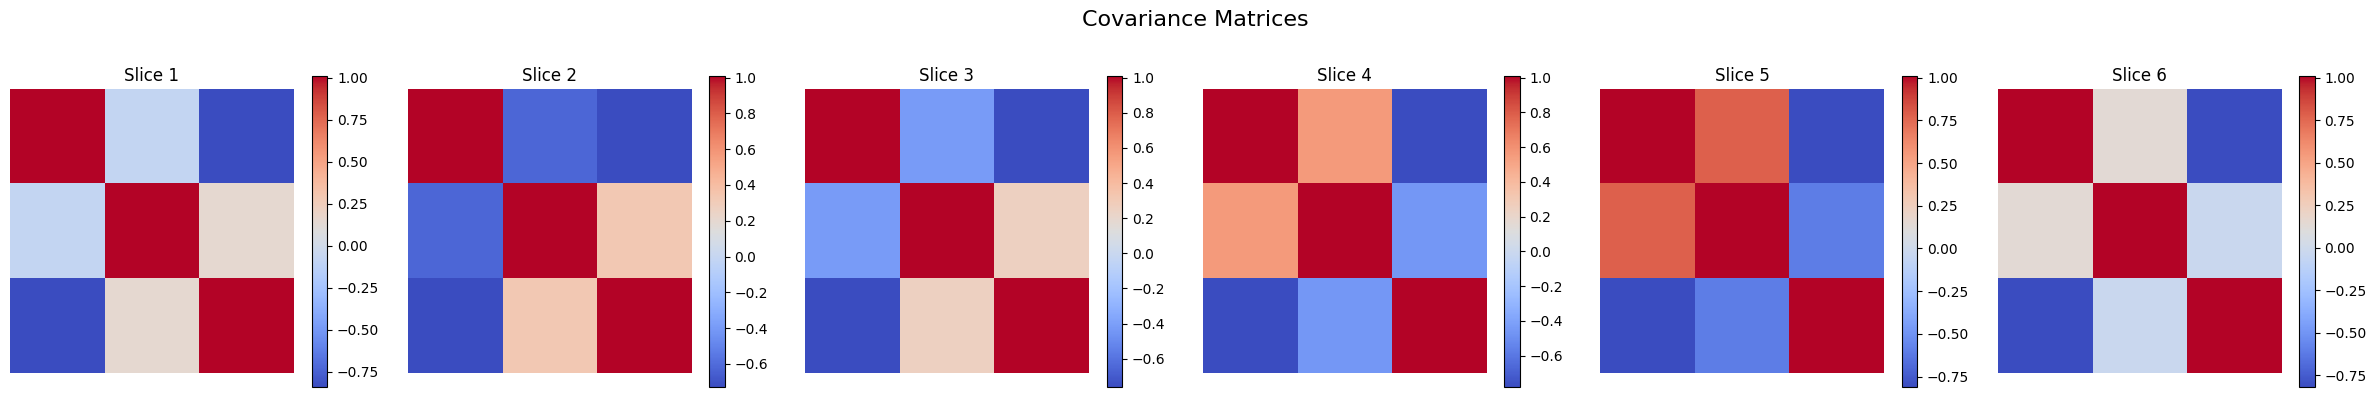

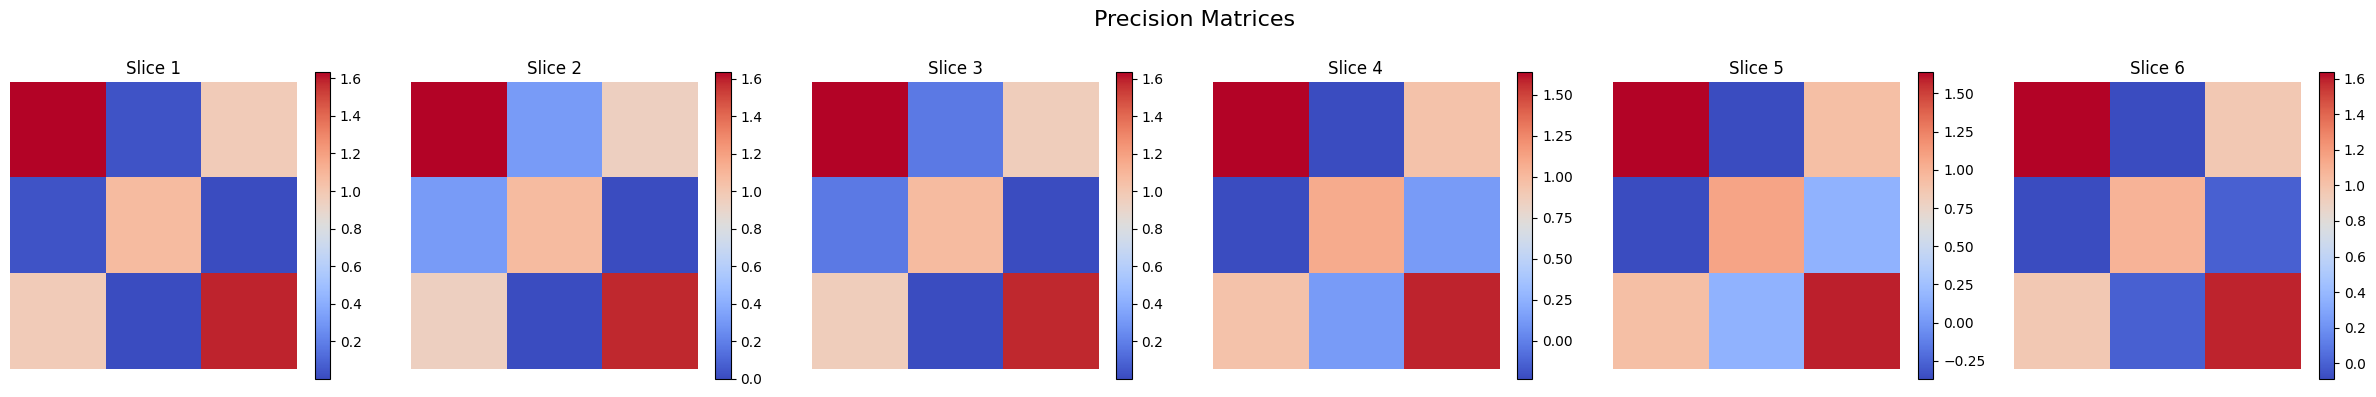

In [5]:
# Function to plot matrices
def plot_matrices(matrices, title, cmap="viridis"):
    num_matrices = len(matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(4 * num_matrices, 4))
    fig.suptitle(title, fontsize=16)
    for i, (matrix, ax) in enumerate(zip(matrices, axes)):
        im = ax.imshow(matrix, cmap=cmap)
        ax.set_title(f"Slice {i + 1}")
        ax.axis("off")
        fig.colorbar(im, ax=ax)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot covariance matrices
plot_matrices(model.covariance_set, title="Covariance Matrices", cmap="coolwarm")

# Plot precision matrices
plot_matrices(model.precision_set, title="Precision Matrices", cmap="coolwarm")


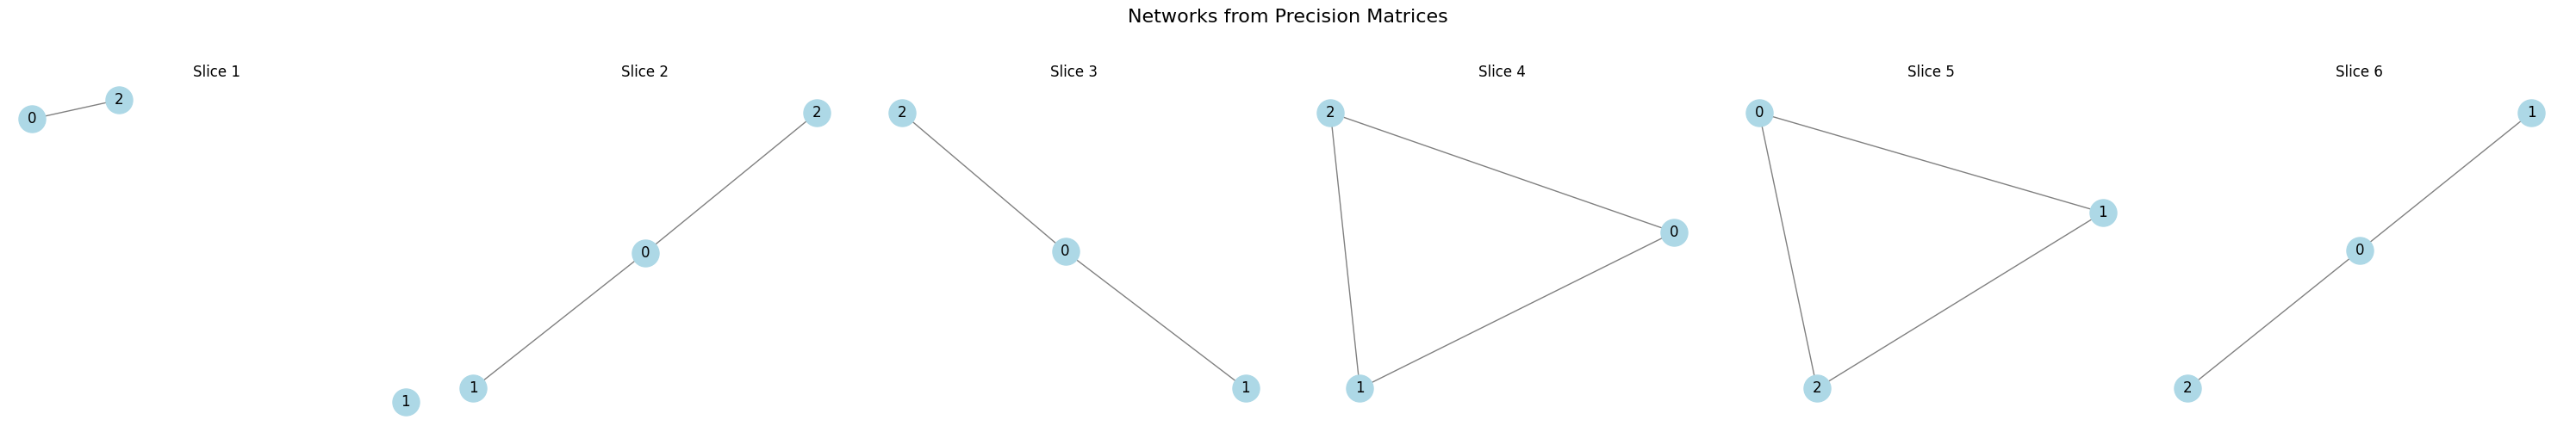

In [8]:
# Function to plot network graphs
def plot_networks(precision_matrices, threshold=0.1, title="Networks"):
    num_matrices = len(precision_matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(5 * num_matrices, 5))
    fig.suptitle(title, fontsize=16)

    for i, (precision, ax) in enumerate(zip(precision_matrices, axes)):
        # Threshold precision matrix for sparsity
        adjacency_matrix = np.abs(precision) > threshold

        # Create graph from adjacency matrix
        G = nx.from_numpy_array(adjacency_matrix)

        # Remove self-loops
        G.remove_edges_from(nx.selfloop_edges(G))

        # Plot the graph
        pos = nx.spring_layout(G)  # Spring layout for better visualization
        nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500)
        ax.set_title(f"Slice {i + 1}")
        ax.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot the networks from precision matrices
plot_networks(model.precision_set, threshold=0.05, title="Networks from Precision Matrices")
